In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('sample_data/howpop_train.csv')
df.head(3).transpose()

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Видалення даних, що закінчуються на _lognorm.

In [ ]:
df = df[[x for x in df.columns if not x.endswith('_lognorm')]]
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


Перетворення даних у стовбці published до типу datetime.

In [ ]:
df['published'] = df.published.astype('datetime64', errors='ignore')
df['published'].head(3)

0   2008-01-01 18:19:00
1   2008-01-01 18:30:00
2   2008-01-01 18:34:00
Name: published, dtype: datetime64[ns]

Створення кількох стовбців на основі даних про час публікації.

In [ ]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]
df[['year', 'month', 'dayofweek', 'hour']].head(3)

,year,month,dayofweek,hour
0,2008,1,2,18
1,2008,1,2,18
2,2008,1,2,18


**1. В якому році та місяці було найбільше публікацій?**
*   Березень 2016
*   Березень 2015
*   Квітень 2015
*   Квітень 2016

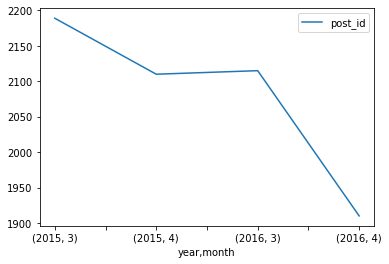

In [ ]:
sub_df = df[['year', 'month', 'post_id']]
sub_df = sub_df[sub_df['year'].between(2015, 2016) & 
                sub_df['month'].between(3, 4)]\
                .groupby(['year', 'month']).count().plot()

Найбільше публікацій було в березні 2015 року.

**2. Проаналізуйте публікації в місяці з попереднього питання. Оберіть один або кілька варіантів.**
* Один або кілька днів сильно виділяються із загальної картини
* На Хабрі (habrahabr.ru) завжди більше статей, ніж на Гіктаймсі (geektimes.ru)
* По суботах на Гіктаймсі та Хабрі публікують приблизно однакове число статей

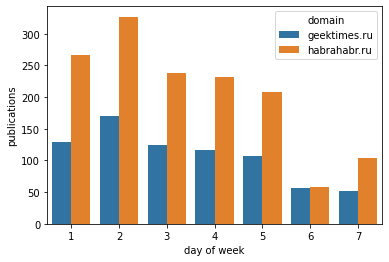

In [ ]:
g = sns.barplot(data=df[['dayofweek', 'domain', 'post_id']]\
                [(df['year'] == 2015) & (df['month'] == 3)]\
                .groupby(['dayofweek', 'domain'], as_index=False).count(), 
                x='dayofweek', y='post_id', hue='domain')
renamed = g.set(xlabel='day of week', ylabel='publications')

* Вівторок виділяється із загальної картини
* На Хабрі завжди більше статей, ніж на Гіктаймсі
* По суботах на Гіктаймсі та Хабрі публікують приблизно однакове число статей

**3. Коли найкраще опублікувати статтю? Оберіть один або кілька варіантів.**
* Найбільше переглядів набирають статті, опубліковані о 12 годині дня
* В опублікованих о 10 ранку постів найбільше коментарів
* Найбільше переглядів набирають статті, опубліковані о 6 годині ранку
* Максимальна кількість коментарів на Гіктаймсі набрала стаття, опублікована о 9
годині вечора
* На Хабрі денні статті коментують частіше, ніж вечірні

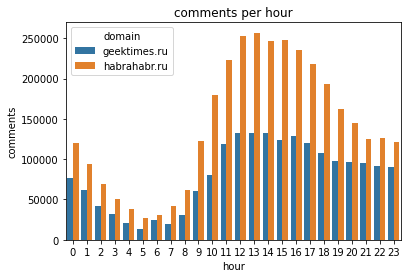

In [ ]:
g = sns.barplot(data=df[['hour', 'domain', 'comments']]\
                .groupby(['hour', 'domain'], as_index=False).sum(), 
                x='hour', y='comments', hue='domain')
renamed = g.set(title='comments per hour')

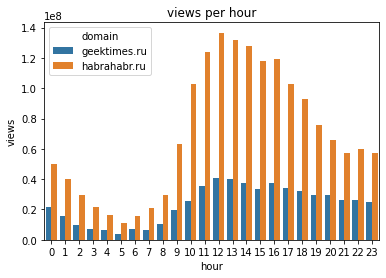

In [ ]:
g = sns.barplot(data=df[['hour', 'domain', 'views']]\
                .groupby(['hour', 'domain'], as_index=False).sum(), 
                x='hour', y='views', hue='domain')
renamed = g.set(title='views per hour')

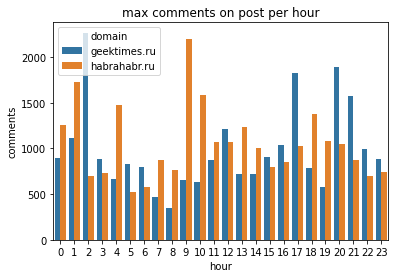

In [ ]:
g = sns.barplot(data=df[['hour', 'domain', 'comments']]\
                .groupby(['hour', 'domain'], as_index=False).max(), 
                x='hour', y='comments', hue='domain')
renamed = g.set(title='max comments on post per hour')

* Найбільше переглядів набирають статті, опубліковані о 12 годині дня
* На Хабрі денні статті коментують частіше, ніж вечірні

**4. Кого з топ-20 авторів найчастіше мінусують?**
* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

**Примітка:** рейтингом автора вважатимемо загальну кількість переглядів його постів.

In [ ]:
top_authors = df[['author', 'views']].groupby('author').sum()\
.sort_values(by=['views'], ascending=False).head(20).index.values.tolist()

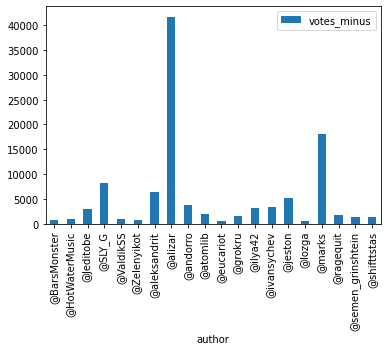

In [ ]:
df[['author', 'votes_minus']][df['author'].isin(top_authors)]\
                .groupby(['author']).sum()\
                .plot(kind='bar', rot='90')

Відповідь: @alizar.

**5. Порівняйте суботи і понеділки. Чи правда, що по суботах автори пишуть в основному вдень, а по понеділках – в основному ввечері?**

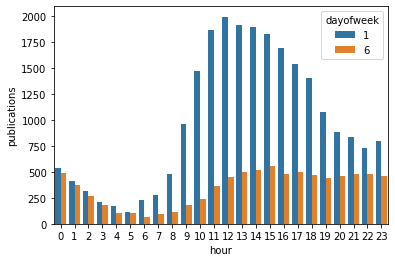

In [ ]:
g = sns.barplot(data=df[['post_id', 'dayofweek', 'hour']]\
                [df['dayofweek'].isin([1, 6])]\
                .groupby(['dayofweek', 'hour'], as_index=False).count(), 
                x='hour', y='post_id', hue='dayofweek')
renamed = g.set(ylabel='publications')

Частково правда: по понеділках автори пишуть в основному зранку і вдень, а по суботах – в основному вдень і ввечері.